# Data Exploration Notebook
This notebook helps visualize your dataset and identify useful patterns using pandas and matplotlib.

In [1]:
! pip install seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

angles_df = pd.read_csv('data/angles.csv')
labels_df = pd.read_csv('data/labels.csv')
dists_df = pd.read_csv('data/calculated_3d_distances.csv')
landmarks_df = pd.read_csv('data/landmarks.csv')


df = angles_df.merge(dists_df, on=['vid_id', 'frame_order']).merge(landmarks_df, on=['vid_id', 'frame_order']).merge(labels_df, on='vid_id')
df.head()

,vid_id,frame_order,right_elbow_right_shoulder_right_hip,left_elbow_left_shoulder_left_hip,right_knee_mid_hip_left_knee,right_hip_right_knee_right_ankle,left_hip_left_knee_left_ankle,right_wrist_right_elbow_right_shoulder,left_wrist_left_elbow_left_shoulder,left_shoulder_left_wrist,...,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index,class
0,0,0,16.926802,7.667874,18.982162,112.747505,112.62553,112.099300,101.05565,44.616184,...,-4.885307,67.512770,40.333897,5.356711,73.934240,11.780330,-5.852993,73.78203,9.016774,jumping_jack
1,0,1,14.199318,8.954973,18.966124,109.707190,109.76263,110.645454,102.00027,44.785343,...,-4.753275,64.969570,45.439384,5.492989,73.177270,18.108229,-6.038326,72.70349,14.222010,jumping_jack
2,0,2,18.065800,10.315741,17.527954,114.562100,112.08965,113.340350,104.09502,44.907803,...,-4.517086,64.510980,48.996880,5.433758,72.199036,19.192911,-5.513490,71.79309,17.322145,jumping_jack
3,0,3,23.270214,17.336140,17.195545,117.674810,115.43172,114.634530,107.38297,45.922737,...,-4.674540,64.720245,53.581780,5.768750,72.696290,23.325266,-5.238461,72.11217,21.887375,jumping_jack
4,0,4,22.831680,13.822096,17.355429,117.536720,117.96766,112.306390,98.39078,40.620460,...,-4.098778,62.490230,52.845634,5.633003,70.438194,23.657516,-5.467475,70.08317,22.496626,jumping_jack


## Basic Information and Structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83922 entries, 0 to 83921
Columns: 125 entries, vid_id to class
dtypes: float64(122), int64(2), object(1)
memory usage: 80.0+ MB


In [6]:
df.describe()

,vid_id,frame_order,right_elbow_right_shoulder_right_hip,left_elbow_left_shoulder_left_hip,right_knee_mid_hip_left_knee,right_hip_right_knee_right_ankle,left_hip_left_knee_left_ankle,right_wrist_right_elbow_right_shoulder,left_wrist_left_elbow_left_shoulder,left_shoulder_left_wrist,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
count,83922.000000,83922.000000,83922.000000,83922.000000,83922.000000,83922.000000,83922.000000,83922.000000,83922.000000,83922.000000,...,83922.000000,83922.000000,83922.000000,83922.000000,83922.000000,83922.000000,83922.000000,83922.000000,83922.000000,83922.000000
mean,228.045638,114.735457,79.871557,79.763790,51.818013,124.888594,123.162877,127.323886,125.414761,54.514291,...,31.412539,-6.014432,32.443707,33.771141,1.296945,36.523716,16.853101,-6.947282,36.513468,19.452391
std,129.943299,76.217246,42.036016,41.420997,29.674522,41.617279,41.712136,28.290486,29.869885,28.838849,...,78.151614,32.362841,29.272575,76.589025,35.391313,32.736608,81.531818,35.822143,32.750908,79.947321
min,0.000000,0.000000,0.560928,0.490588,0.120331,0.510141,1.827777,1.055918,2.971638,1.136380,...,-492.009920,-98.839110,-99.997480,-462.550960,-99.999916,-100.000000,-562.188000,-99.999820,-99.999756,-538.515440
25%,115.000000,51.000000,46.220257,47.081918,27.473099,93.231241,91.618758,110.266963,106.373474,35.867566,...,-8.618281,-23.360957,11.946253,-5.894891,-20.003912,14.315296,-20.031821,-29.828708,15.097422,-17.830433
50%,231.000000,105.000000,75.508880,75.491405,47.130147,134.741395,132.527290,130.403340,129.529280,46.486087,...,25.683905,-5.416961,39.629506,25.310587,3.381356,46.832336,9.991173,-6.713657,47.046055,10.461853
75%,341.000000,170.000000,111.004510,110.110010,71.133823,161.567255,159.908057,148.764080,148.787172,65.386725,...,58.036960,7.335683,55.748297,59.541873,20.810404,61.260533,45.547099,8.800555,61.163921,44.882225
max,447.000000,300.000000,179.794400,179.903080,177.010220,179.886350,179.901080,179.868770,179.690980,578.582400,...,1334.172500,99.782510,99.999170,1334.077500,99.975290,99.999985,1338.561300,99.958550,100.000000,1333.792700


## Distribution of Classes (Labels)

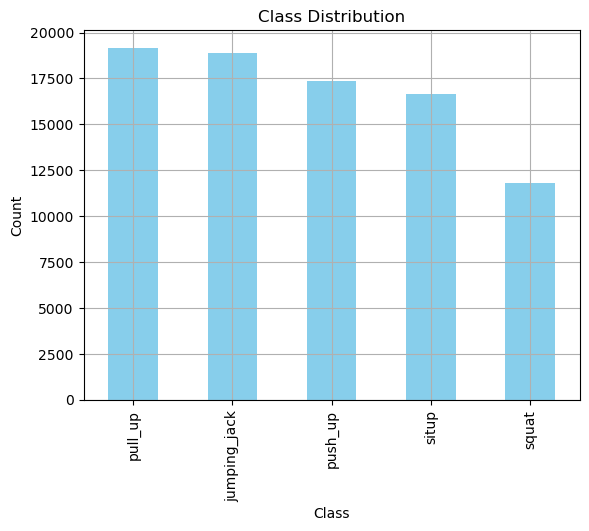

In [7]:
df['class'].value_counts().plot(kind='bar', color='skyblue', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Pie Chart of Class Proportions

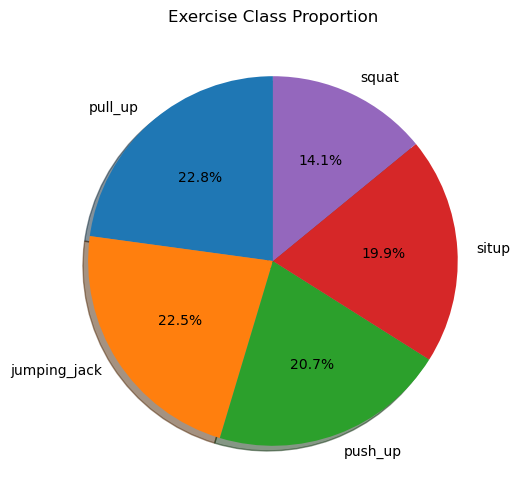

In [8]:
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90, figsize=(6,6))
plt.ylabel('')
plt.title('Exercise Class Proportion')
plt.show()

## Boxplot of Selected Angles by Class

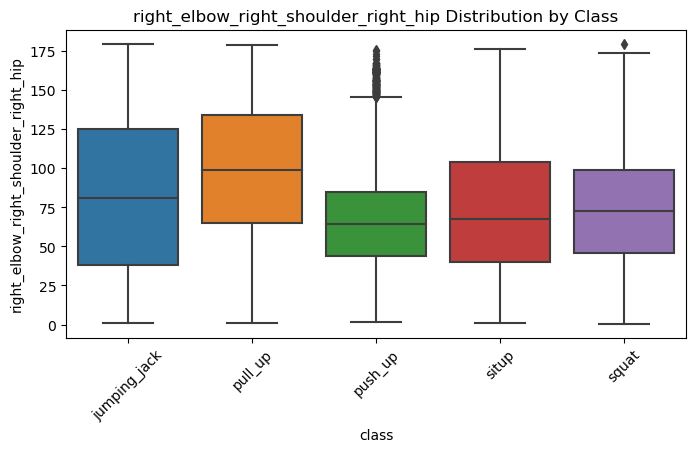

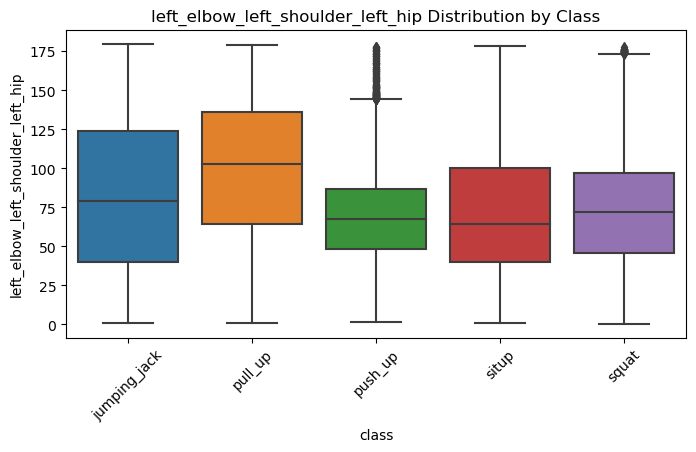

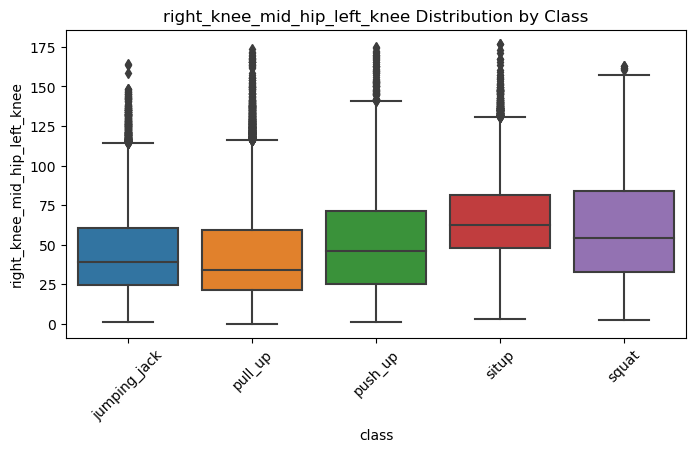

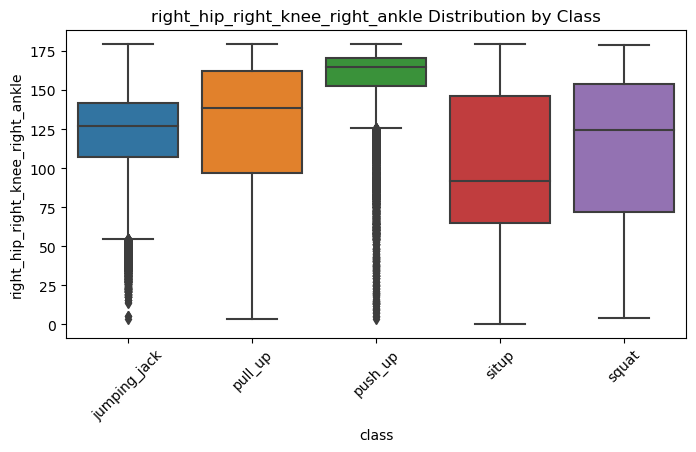

In [11]:
angle_cols = df.columns[2:6]
for col in angle_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'{col} Distribution by Class')
    plt.xticks(rotation=45)
    plt.show()

## Correlation Heatmap (Numerical Columns Only)

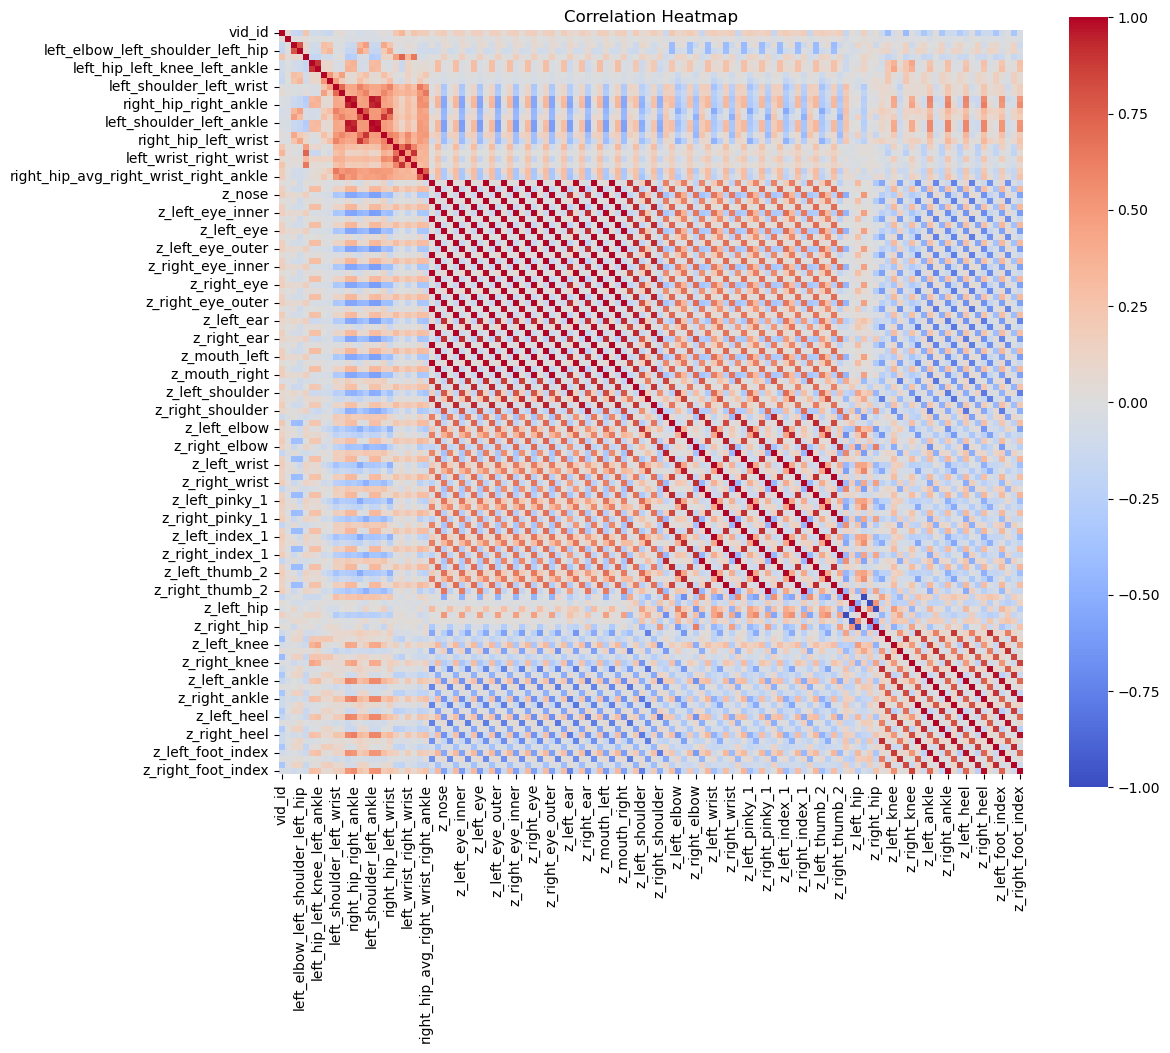

In [10]:
# Sample a subset of columns if full set is too large
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()